## Problem Statement

Given tables of frequency, amplitude, and phase we need to fit an interpolation function to these functions.

This involves fitting a complex-valued function so there are two functions to fit.  

1. The data from the manufacturer is not expected to come in homogeneous formats.  We will need an agreed upon standard method of interfacing with these tables.  Below I give an example from an old file format I used in the past

Header = Frequency [Hz],Amplitude [V/nT],phase [degrees]

2. asd




## Example Table

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import re
from scipy.interpolate import InterpolatedUnivariateSpline
from mth5_test_data.util import MTH5_TEST_DATA_DIR
#print(MTH5_TEST_DATA_DIR)
#print(type(MTH5_TEST_DATA_DIR))
qf_ant4_dir = MTH5_TEST_DATA_DIR.joinpath("calibration_files/qf/ant4")
qf_ant4_filebase = "1304_0_0.csv"
qf_ant4_filepath = qf_ant4_dir.joinpath(qf_ant4_filebase)
print(qf_ant4_filepath)
#!cat /home/kkappler/.cache/iris_mt/mth5_test_data/mth5_test_data/calibration_files/qf/ant4/1304_0_0.csv


/home/kkappler/.cache/iris_mt/mth5_test_data/mth5_test_data/calibration_files/qf/ant4/1304_0_0.csv


In [20]:
def read_and_parse_fap_header(fap_file_name):
    """
    handles the specific case of fap headers of the following form:
    Frequency [Hz],Amplitude [V/nT],phase [degrees]
    """

    #<initialize rparams>
    frequency_units = None
    amplitude_units = None
    phase_units = None
    #<\initialize rparams>
    
    with open(fap_file_name) as f:
        header_list = f.readline().strip().split(',')
    
    looking_for = ['frequency', 'amplitude', 'phase']
    for text_string in header_list:
        for label in looking_for:
            if re.search(label, text_string.lower() ):
                if label == 'frequency':
                    frequency_units = text_string.split('[', 1)[1].split(']')[0]
                elif label == 'amplitude':
                    amplitude_units = text_string.split('[', 1)[1].split(']')[0]
                elif label == 'phase':
                    phase_units = text_string.split('[', 1)[1].split(']')[0]

    #Check that the rparams are not None
    if None in [frequency_units, amplitude_units, phase_units]:
        logger.warn("couldn't find at least one of frequency, amplitude or phase units")

    units_out, units_in = amplitude_units.split('/')
    units_out = units_out.strip()
    units_in = units_in.strip()
    
    out_dict = {}
    out_dict['frequency_units'] = frequency_units
    out_dict['amplitude_units'] = amplitude_units
    out_dict['phase_units'] = phase_units
    out_dict['units_out'] = units_out
    out_dict['units_in'] = units_in
    return out_dict



In [21]:
header_info_dict = read_and_parse_fap_header(qf_ant4_filepath)
print(header_info_dict)

{'frequency_units': 'Hz', 'amplitude_units': 'V/nT', 'phase_units': 'degrees', 'units_out': 'V', 'units_in': 'nT'}


In [22]:
df = pd.read_csv(qf_ant4_filepath, skiprows=1, names=['frequency', 'amplitude', 'phase'])
df

,frequency,amplitude,phase
0,1.000000e-20,1.000000e-20,90.000000
1,1.000000e-10,1.000000e-10,90.000000
2,1.580000e-02,6.333601e-02,86.219084
3,1.616803e-02,6.480528e-02,86.131264
4,1.654463e-02,6.630833e-02,86.041414
...,...,...,...
390,9.160901e+01,2.316075e-03,-255.239800
391,9.363833e+01,2.168463e-03,-255.713700
392,9.571260e+01,2.030259e-03,-256.187500
393,9.783282e+01,1.900864e-03,-256.661400


In [41]:
x = df['frequency'][2:]
y = df['amplitude'][2:]
spl = InterpolatedUnivariateSpline(x, y, k=1)

# Linear

Text(0.5, 1.0, 'Linear Scales on both axes')

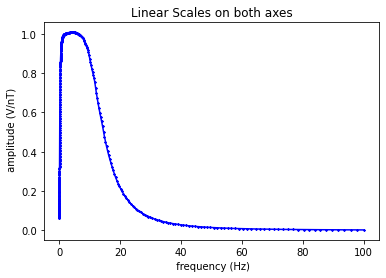

In [43]:
plt.plot(df['frequency'][2:], df['amplitude'][2:], 'b*', markersize=2)
plt.plot(x, spl(x), 'blue')
plt.xlabel(' frequency (Hz)')
plt.ylabel(' amplitude (V/nT)')
plt.title("Linear Scales on both axes")

# Semi Log X

Text(0.5, 1.0, 'SemiLog X')

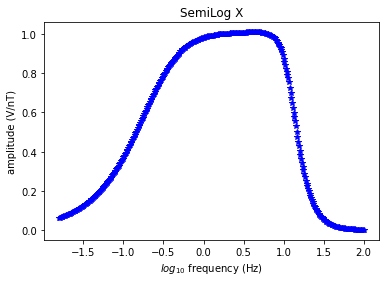

In [36]:
plt.plot(np.log10(df['frequency'][2:]), df['amplitude'][2:], 'b*')
plt.xlabel('$log_{10}$ frequency (Hz)')
plt.ylabel('amplitude (V/nT)')
plt.title("SemiLog X")

# Log-Log

Text(0.5, 1.0, 'title')

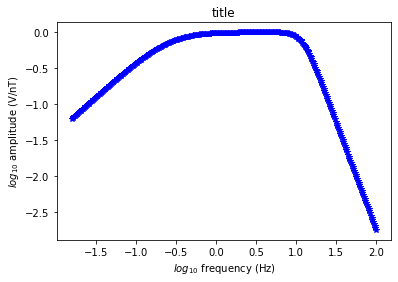

In [38]:
plt.plot(np.log10(df['frequency'][2:]), np.log10(df['amplitude'][2:]), 'b*')
plt.xlabel('$log_{10}$ frequency (Hz)')
plt.ylabel('$log_{10}$ amplitude (V/nT)')
plt.title("title")

Text(0.5, 1.0, 'title')

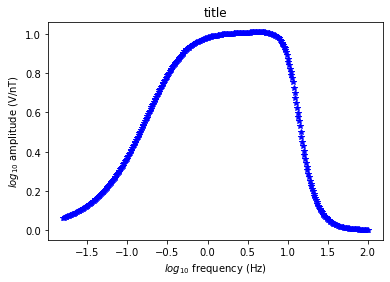

In [32]:
x = df['frequency'][2:]
y = df['amplitude'][2:]
spl = InterpolatedUnivariateSpline(x, y, k=1)
plt.plot(np.log10(df['frequency'][2:]), df['amplitude'][2:], 'b*')
plt.plot(spl(x), df['amplitude'][2:], 'b*')

plt.xlabel('$log_{10}$ frequency (Hz)')
plt.ylabel('$log_{10}$ amplitude (V/nT)')
plt.title("title")

### Next Steps

Do a simple interpolation fit using InterpolatedUnivariateSpline
look at the fit in both linear and log space
quantify the errors ... wait, there wont be any .. because it interpolates ... ugh... 